In [1]:
# 1. Imports & setup 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2. Load dataset 
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
# Quick info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [5]:
# 3. Data preparation 
bins = [5, 10, 15, 20]
labels = ['6-10', '11-15', '16-20']
df['Age_Band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df['Age_Band'] = pd.Categorical(df['Age_Band'], categories=labels, ordered=True)
df[['Age','Age_Band']].head()

,Age,Age_Band
0,14,11-15
1,11,11-15
2,18,16-20
3,15,11-15
4,12,11-15


## Univariate analysis

**Distribution of daily screen time**

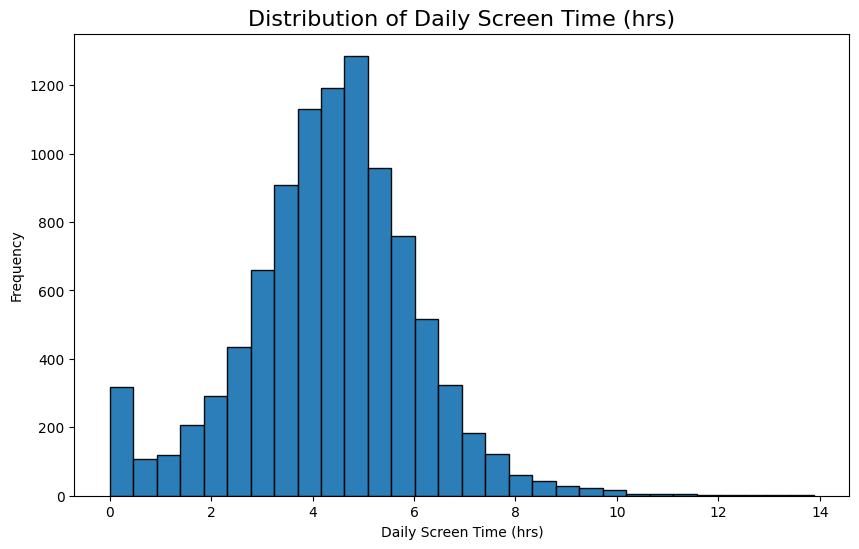

In [7]:
# Histogram: Distribution of daily screen time
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df['Avg_Daily_Screen_Time_hr'].dropna(), bins=30, edgecolor='black', alpha=0.95)
ax.set_title('Distribution of Daily Screen Time (hrs)', fontsize=16)
ax.set_xlabel('Daily Screen Time (hrs)')
ax.set_ylabel('Frequency')
plt.show()

**Distribution of Age Bands**

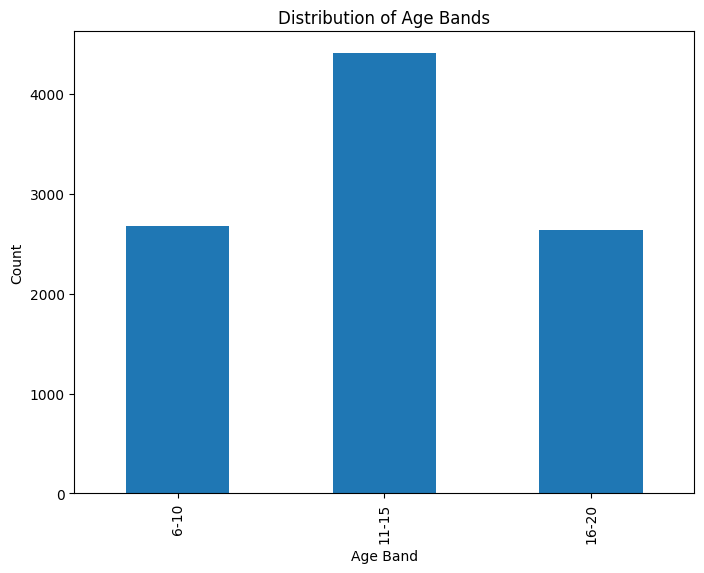

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
counts = df['Age_Band'].value_counts().reindex(labels)
counts.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Age Bands')
ax.set_xlabel('Age Band')
ax.set_ylabel('Count')
plt.show()

**Primary device usage**

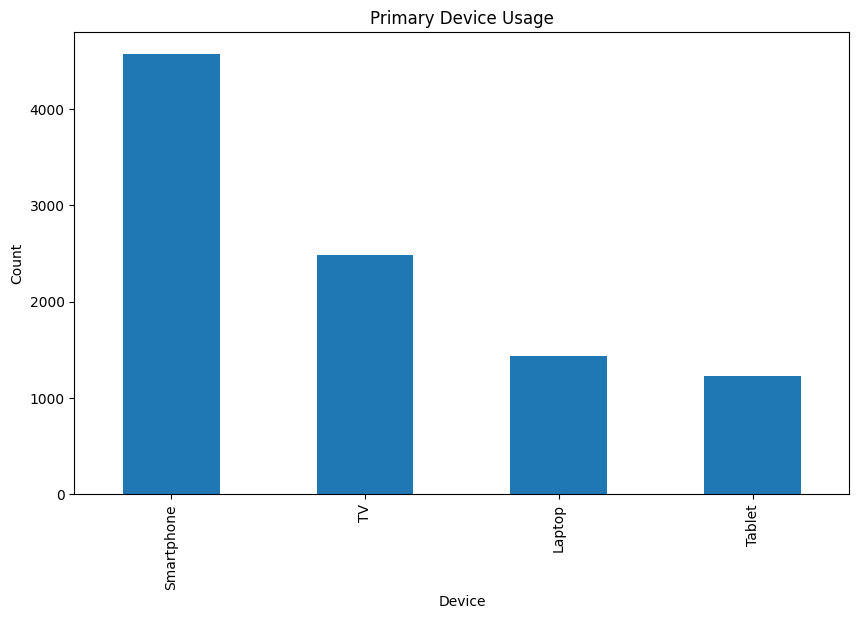

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
dev_counts = df['Primary_Device'].value_counts()
dev_counts.plot(kind='bar', ax=ax)
ax.set_title('Primary Device Usage')
ax.set_xlabel('Device')
ax.set_ylabel('Count')
plt.show()

## Bivariate analysis

**Boxplot: Screen time by Gender**

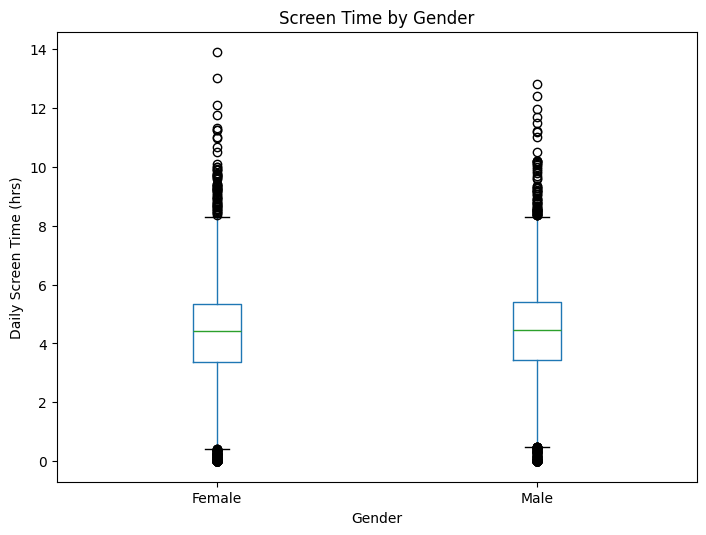

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
df.boxplot(column='Avg_Daily_Screen_Time_hr', by='Gender', ax=ax, grid=False)
plt.suptitle('')
ax.set_title('Screen Time by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Daily Screen Time (hrs)')
plt.show()

**Boxplot: Screen time by Age Band**

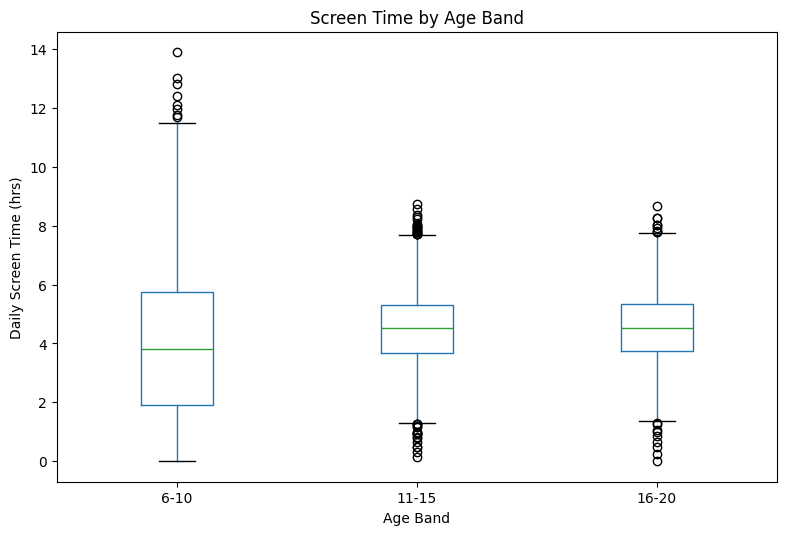

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
df.boxplot(column='Avg_Daily_Screen_Time_hr', by='Age_Band', ax=ax, grid=False)
plt.suptitle('')
ax.set_title('Screen Time by Age Band')
ax.set_xlabel('Age Band')
ax.set_ylabel('Daily Screen Time (hrs)')
plt.show()

**Boxplot: Screen time by Location Type (Urban/Rural)**

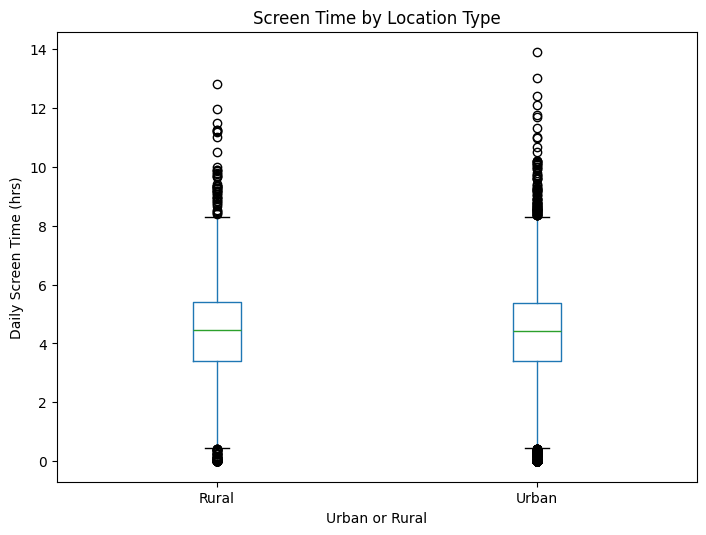

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
df.boxplot(column='Avg_Daily_Screen_Time_hr', by='Urban_or_Rural', ax=ax, grid=False)
plt.suptitle('')
ax.set_title('Screen Time by Location Type')
ax.set_xlabel('Urban or Rural')
ax.set_ylabel('Daily Screen Time (hrs)')
plt.show()

**Line plot: Average screen time by Age Band and Gender**

C:\Users\santh\AppData\Local\Temp\ipykernel_11944\829041211.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age_Band','Gender'])['Avg_Daily_Screen_Time_hr'].mean().unstack()


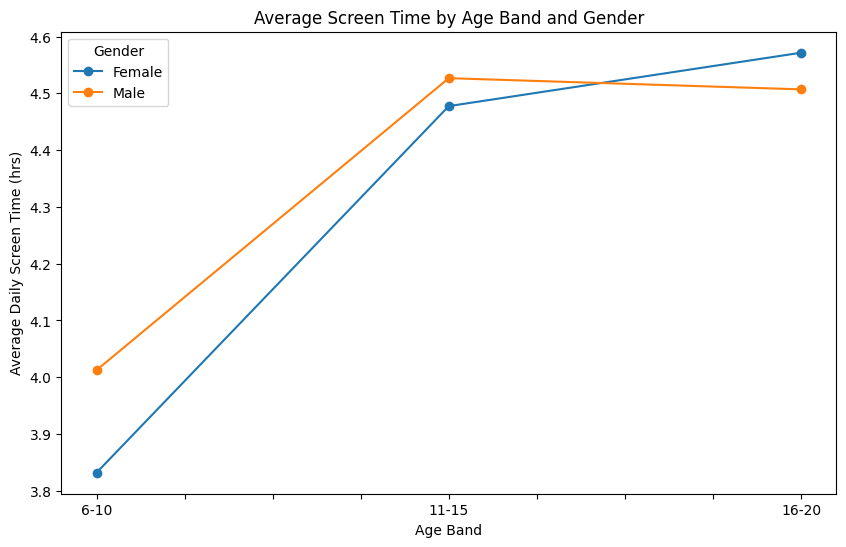

In [16]:
grouped = df.groupby(['Age_Band','Gender'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
fig, ax = plt.subplots(figsize=(10,6))
grouped.plot(ax=ax, marker='o')
ax.set_title('Average Screen Time by Age Band and Gender')
ax.set_xlabel('Age Band')
ax.set_ylabel('Average Daily Screen Time (hrs)')
ax.legend(title='Gender')
plt.show()

**Overlay: Screen time distribution by Age Band**

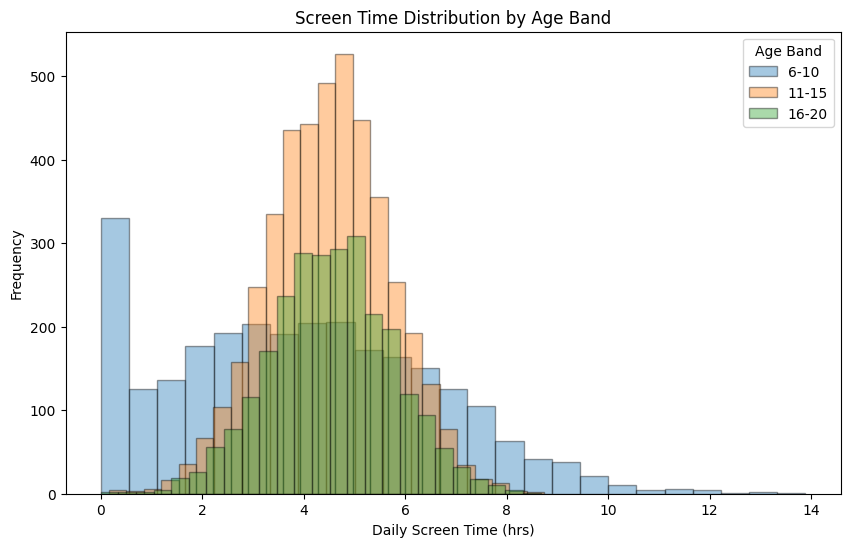

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
for band in labels:
    subset = df.loc[df['Age_Band'] == band, 'Avg_Daily_Screen_Time_hr'].dropna()
    if len(subset) > 0:
        ax.hist(subset, bins=25, alpha=0.4, label=str(band), edgecolor='black')
ax.set_title('Screen Time Distribution by Age Band')
ax.set_xlabel('Daily Screen Time (hrs)')
ax.set_ylabel('Frequency')
ax.legend(title='Age Band')
plt.show()

## Topic trends — Health Impacts

We split the `Health_Impacts` column by commas and count occurrences.

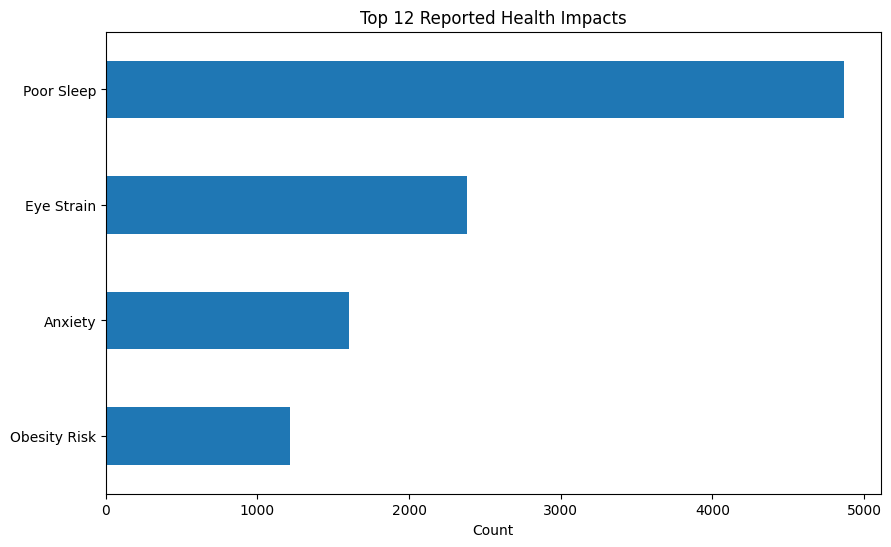

In [19]:
impacts_series = df['Health_Impacts'].dropna().astype(str).str.split(',')
impacts_flat = [it.strip() for sub in impacts_series for it in sub if it and it.strip()]
impacts_counts = pd.Series(impacts_flat).value_counts()

# Bar chart
fig, ax = plt.subplots(figsize=(10,6))
top_n = 12
impacts_counts.head(top_n).plot(kind='barh', ax=ax)
ax.set_title(f'Top {top_n} Reported Health Impacts')
ax.set_xlabel('Count')
ax.invert_yaxis()
plt.show()

1. From the summary, I noticed that the average daily screen time for kids was quite high, especially among older children.
2. There wasn’t a huge difference between boys and girls, but both groups showed similar screen usage patterns overall.
3. Most kids preferred using mobile phones and tablets, and a large portion of their screen time was spent on gaming and watching videos.
4. I observed that as age increases, screen time also increases, which makes sense since older kids use screens for both education and entertainment.
5. Kids who had parental control or supervision generally had lower screen time compared to those who didn’t — highlighting the impact of monitoring.
6. I identified some outliers, where kids had unusually high screen time — possibly due to online classes or excessive gaming.
7. Through descriptive statistics, I learned about the mean, median, and variation in screen hours across different groups.
8. I used visualizations like histograms, bar charts, and boxplots to clearly show these differences and patterns.
9. I also created a correlation heatmap that helped me see how screen time relates to other variables like study hours or age.
10. Grouping data by different categories (like family type or city) gave me more context on how environment and lifestyle affect screen habits.11. 
11. From all this, I concluded that screen time among kids is increasing, but it can be effectively managed through balanced routines and parental involvement.